In [1]:
# 导入一些库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  # 显示图像

UsageError: unrecognized arguments: # 显示图像


In [2]:
class knn():
    # 定义类属性
    def __init__(self):
        pass


    def distance(self, x1, x2):
        '''
        本函数用于计算两个点之间的欧氏距离的平方。
        主要注意的是：这里不用求出具体的欧式距离，只要求出平方即可，因为我们是用来做距离比较的，不用求出具体的距离值。
        参数：
            x1: 第一个点的特征取值
            x2: 第二个点的特征取值
        返回值：
            返回两个点之间的距离
        '''
        d = np.diag(np.dot((x1 - x2), (x1 - x2).T))  # 计算欧式距离
        return d


    def compute_k_min_idx(self, array, k):
        '''
        本函数用于求出最小距离点的索引位置
        参数：
            array: 表示计算得到的距离向量
            k: knn近邻参数
        返回值:
            返回距离最小的k个对应的索引
        '''
        lst = array.tolist()  # 将距离向量转化为list形式，这样方便处理
        idx_list = []  # 创建一个列表用来保存结果
        for i in range(k):
            idx = lst.index(min(lst))  # 找到距离最小点的索引
            idx_list.append(idx)  # 将距离最小点的索引添加到一个存储结果的列表中
            lst[idx] = np.inf  # 将最小距离赋值为无穷大，这样处理可以方便计算次小点

        return idx_list


    def vote(self, array):
        '''
        本函数用来根据最近k个点的label进行众投处理
        参数：
            array: 表示最近k个点的label取值向量
        返回值：
            返回距离最近的k个点中，出现次数最多的一个label
        '''
        series = pd.Series(array)  # 转化成pd.Series形式方便进行处理
        count = series.value_counts()  # 统计各个label取值出现的次数
        label = count.index[0]  # 找到出现次数最多的那个label
        return label
    
    def fit(self, x_train, y_train, k):
        self.x_train = x_train
        self.y_train = y_train
        self.k = k
    
    def predict(self, x_test):
        '''
        本函数用来使用knn算法对数据进行分类。
        参数
            x_test: 测试集的特征取值
        返回值
            返回x_test的预测结果
        '''
        # 找到在x_train中距离x_test各点最近的k个点
        y_test = []  # 创建一个list用来保存预测结果
        for x in x_test:  # 遍历测试集中的每一个样本
            d = self.distance(x, self.x_train)  # 计算训练集中各点到目标样本点的距离
            idx = self.compute_k_min_idx(d, self.k)  # 找到距离目标样本点最近的k个点
            label = self.vote(self.y_train[idx])  # 根据最近k个的label取值进行众投
            y_test.append(label)  # 添加预测结果到存放结果的list中
            
        return y_test

In [3]:
# 使用鸢尾花数据集进行测试
df = pd.read_csv('iris_data.csv', encoding='utf-8')
# 为了可视化方便，只选择前两个维度
df = df.iloc[:,[0,1,4]]
# 对数据集进行划分
train_index = list(range(0,30)) + list(range(50,80)) + list(range(100,130))
test_index = list(range(30,50)) + list(range(80,100)) + list(range(130,150))
tarin_data = df.iloc[train_index,:]
test_data = df.iloc[test_index,:]

In [4]:
# 创建一个字典对字符串分类变量进行映射，方便绘图
d = {'setosa':1, 'versicolor':2, 'virginica':3}
df.loc[:,'target'] = df.loc[:,'target'].apply(lambda x: d[x])

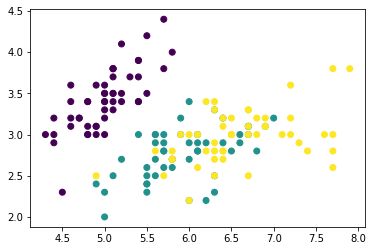

In [5]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'])

In [6]:
x_train = tarin_data.iloc[:,0:2]
y_train = tarin_data.iloc[:,2]
x_test = test_data.iloc[:,0:2]
x_test = np.array(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
model = knn()
model.fit(x_train, y_train, 2)
res = model.predict(x_test)

In [8]:
y_test = np.array(test_data.iloc[:,2])

In [9]:
acc = round(sum(y_test == res) / len(res)*100,2)

In [10]:
print('模型的分类精度为{}%'.format(acc))

模型的分类精度为73.33%


In [28]:
# 使用全部维度进行测试
df = pd.read_csv('iris_data.csv', encoding='utf-8')

In [35]:
train_index = list(range(0,30)) + list(range(50,80)) + list(range(100,130))
test_index = list(range(30,50)) + list(range(80,100)) + list(range(130,150))
tarin_data = df.iloc[train_index,:]
test_data = df.iloc[test_index,:]
x_train = tarin_data.iloc[:,0:4]
y_train = tarin_data.iloc[:,4]
x_test = test_data.iloc[:,0:4]
x_test = np.array(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(test_data.iloc[:,4])

In [36]:
model = knn()
model.fit(x_train, y_train, 2)
res = model.predict(x_test)

In [37]:
acc = round(sum(y_test == res) / len(res)*100,2)
print('模型的分类精度为{}%'.format(acc))

模型的分类精度为95.0%
